In [47]:
import tensorflow as tf
import numpy as np

In [48]:
data1 = np.load('predictive_train2.npz', allow_pickle=True)
train_input = data1['inputs'].astype(float)
train_targets = data1['targets'].astype(float)

data2 = np.load('predictive_validation2.npz', allow_pickle=True)
validation_input = data2['inputs'].astype(float)
validation_targets = data2['targets'].astype(float)

data3 = np.load('predictive_test2.npz', allow_pickle=True)
test_input = data3['inputs'].astype(float)
test_targets = data3['targets'].astype(float)

In [49]:
n_samples = len(train_targets)
classes = np.unique(train_targets)
n_classes = len(classes)

classweight = {}

for cls in classes:
    n_cls = np.sum(train_targets == cls)
    classweight[cls] = n_samples / (n_cls * n_classes)


In [58]:
output_layer_size = 6
hidden_layer_size = 50

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_layer_size, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [51]:
train_targets = train_targets.reshape(-1)
validation_targets = validation_targets.reshape(-1)
test_targets = test_targets.reshape(-1)

In [61]:
epoch = 100
early_stop = tf.keras.callbacks.EarlyStopping(patience = 2, restore_best_weights=True)


model.fit(
    train_input,
    train_targets,
    batch_size = 100,
    class_weight = classweight,
    epochs = epoch,
    callbacks = early_stop,
    validation_data = (validation_input, validation_targets),
    verbose = 1 
)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5735 - loss: 0.6398 - val_accuracy: 0.5800 - val_loss: 1.0033
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5447 - loss: 0.5907 - val_accuracy: 0.6130 - val_loss: 0.9119
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5885 - loss: 0.5611 - val_accuracy: 0.5860 - val_loss: 0.9751
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5986 - loss: 0.4775 - val_accuracy: 0.5650 - val_loss: 0.9101
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5791 - loss: 0.4850 - val_accuracy: 0.6090 - val_loss: 0.8912
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6291 - loss: 0.4154 - val_accuracy: 0.6160 - val_loss: 0.8679
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6306 - loss: 0.4079 - val_accuracy: 0.5850 - val_loss: 0.8616
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6509 - loss: 0.4204 - val_accuracy: 0.5530 - v

In [62]:
model.evaluate(test_input, test_targets)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6584 - loss: 0.7129 


[0.7185994386672974, 0.6840000152587891]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


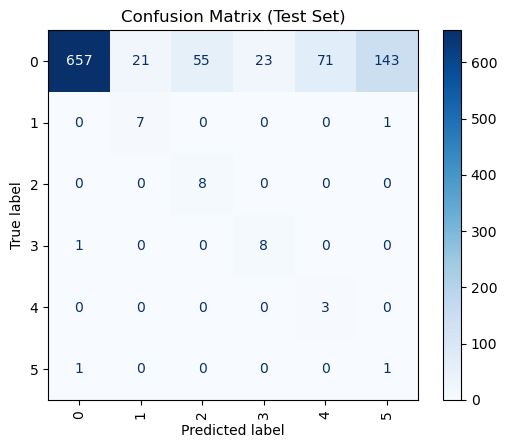

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(test_input).argmax(axis=1)

cm = confusion_matrix(test_targets, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix (Test Set)")
plt.show()